### Import libraries

In [51]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

### Bonus: calculate the average pixel value for all the images in the dataset

#### Load the images with a dimension of 280x280 

In [203]:
train_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_280pix.csv")
val_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_280pix.csv")
test_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_280pix.csv")

#### Preprocess the lists of pixels and calculate the average of every single pixel in the dataset

In [167]:
#really slow method to calculate the mean

list_of_red_pixels=[]
list_of_green_pixels=[]
list_of_blue_pixels=[]
a=time.time()
list_of_red_pixels=[]
for x in train_dataset['Red'].columns:
    if x<10:
        list_of_red_pixels.append(train_dataset['Red'][[x]].mean())
        #list_of_green_pixels.append(train_dataset['Green'].iloc[x])
        #list_of_blue_pixels.append(train_dataset['Blue'].iloc[x])
#plt.hist(list(flatten(train_dataset['Red']))) reduce a two-dimensional list in a one-dimensional one
b=time.time()
time=b-a
#list_of_red_pixels,time

In [168]:
#really quick method to calculate the mean (and std)
#a method to 
#calculate the mean in less than one second
mean_values_red=train_dataset['Red'][[x for x in train_dataset['Red'].columns]].mean()
mean_values_red_std=train_dataset['Red'][[x for x in train_dataset['Red'].columns]].std()
mean_values_green=train_dataset['Green'][[x for x in train_dataset['Green'].columns]].mean()
#calculate the std
mean_values_green_std=train_dataset['Green'][[x for x in train_dataset['Green'].columns]].std()
mean_values_blue=train_dataset['Blue'][[x for x in train_dataset['Blue'].columns]].mean()
mean_values_blue_std=train_dataset['Blue'][[x for x in train_dataset['Blue'].columns]].std()
#mean_values_red_std,mean_values_green_std,mean_values_blue_std

In [169]:
px=280
pixs=(px,px)
mean_values_red=pd.DataFrame(np.array(mean_values_red).reshape(pixs))
mean_values_blue=pd.DataFrame(np.array(mean_values_blue).reshape(pixs))
mean_values_green=pd.DataFrame(np.array(mean_values_green).reshape(pixs))

mean_values_red_std=pd.DataFrame(np.array(mean_values_red_std).reshape(pixs))
mean_values_blue_std=pd.DataFrame(np.array(mean_values_blue_std).reshape(pixs))
mean_values_green_std=pd.DataFrame(np.array(mean_values_green_std).reshape(pixs))


In [170]:

summed_image=[]
arrayz=np.zeros([px,px,3],dtype=np.uint8)
arrayz_std=np.zeros([px,px],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[mean_values_red.iloc[index,column],
                              mean_values_blue.iloc[index,column],
                              mean_values_green.iloc[index,column]]
        arrayz_std[index,column]=statistics.mean([mean_values_red.iloc[index,column],
                              mean_values_blue.iloc[index,column],
                              mean_values_green.iloc[index,column]])

arrayz_std

array([[122, 123, 123, ..., 127, 127, 126],
       [125, 124, 124, ..., 125, 126, 126],
       [126, 126, 127, ..., 127, 127, 126],
       ...,
       [103, 101, 101, ..., 101, 101, 101],
       [101, 102, 103, ...,  96,  97,  98],
       [ 98,  98,  98, ...,  98,  97,  97]], dtype=uint8)

#### Final image of the average pixel values considering all the images in the train dataset

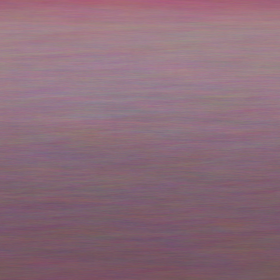

In [171]:
img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Final image of the average red component considering all the images in the train dataset

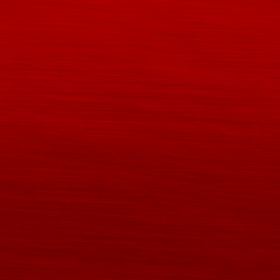

In [172]:
arrayz=np.zeros([px,px,3],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[mean_values_red.iloc[index,column],
                              0,
                              0]
img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Final image of the average blue component considering all the images in the train dataset

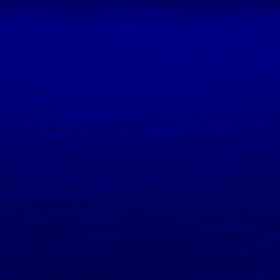

In [173]:
arrayz=np.zeros([px,px,3],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[0,
                              0,
                              mean_values_blue.iloc[index,column]]

img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Final image of the average green component considering all the images in the train dataset

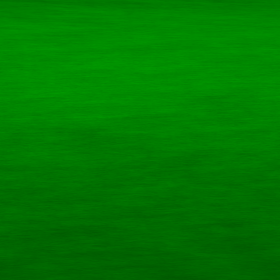

In [174]:

arrayz=np.zeros([px,px,3],dtype=np.uint8)
for index in mean_values_red.index.values:
    for column in mean_values_red.columns.values:
        arrayz[index,column]=[0,
                              mean_values_green.iloc[index,column],
                              0]

img_iris=Image.fromarray(arrayz)#.reshape((285,285)))
img_iris

#### Enhanced figures with Matplotlib

Text(0.5, 1.0, 'Green in the train dataset')

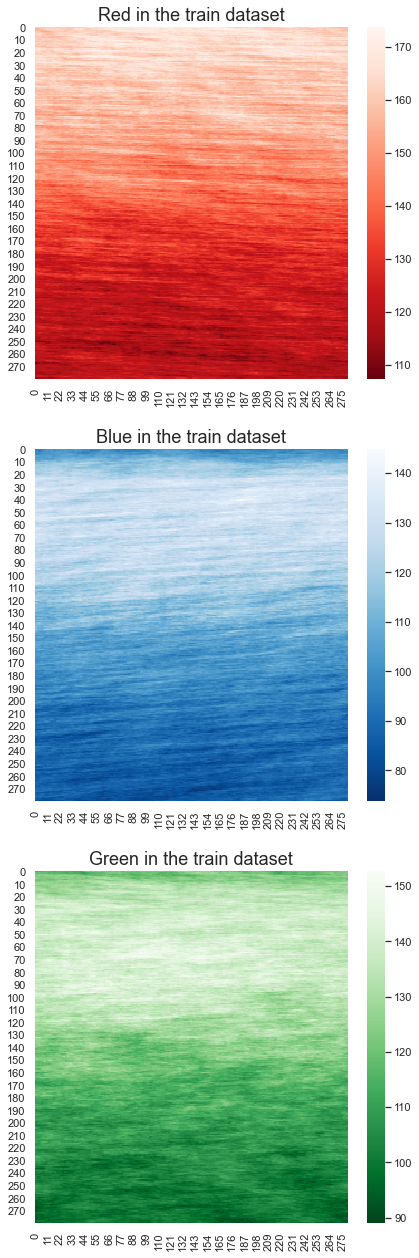

In [175]:

size=7
fig=plt.figure(figsize=(size,22))

ax1=fig.add_subplot(3,1,1)
palette=plt.get_cmap('Reds').reversed()
sns.heatmap(mean_values_red,cmap=palette)
#ax2.rcParams['axes.titlepad']=6
#sns.set(rc={'figure.figsize':(20,20)})
ax1.set_title('Red component in the train dataset',{'fontsize': 18})


ax2=fig.add_subplot(3,1,2)
palette=plt.get_cmap('Blues').reversed()
sns.heatmap(mean_values_blue,cmap=palette)
#ax2.rcParams['axes.titlepad']=6
sns.set(rc={'figure.figsize':(20,20)})
ax2.set_title('Blue component in the train dataset',{'fontsize': 18})
#xlabel('size')

ax3=fig.add_subplot(3,1,3)
palette=plt.get_cmap('Greens').reversed()
sns.heatmap(mean_values_green,cmap=palette)
#ax3.rcParams['axes.titlepad']=6
ax3.set_title('Green component in the train dataset',{'fontsize': 18})
#xlabel('size')

#### Plot of standard deviation of each pixel value considering all the images in the train dataset

Text(0.5, 1.0, 'Standard deviation')

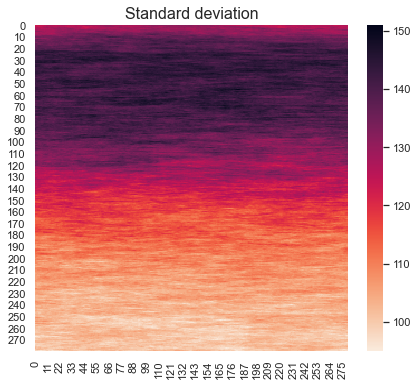

In [184]:

fig=plt.figure(figsize=(size,size-1))

ax1=fig.add_subplot(1,1,1)

sns.heatmap(arrayz_std,cmap='rocket_r')
ax1.set_title('Standard deviation',{'fontsize': 16})
#ax1.set_rcParams['axes.titlepad']=6